In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('headbrain.csv')
print(data)

     Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
5         1          1             3585                 1300
6         1          1             3785                 1400
7         1          1             3559                 1255
8         1          1             3613                 1355
9         1          1             3982                 1375
10        1          1             3443                 1340
11        1          1             3993                 1380
12        1          1             3640                 1355
13        1          1             4208                 1522
14        1          1             3832                 1208
15        1          1  

In [47]:
print(data.shape)

(237, 4)


In [48]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [49]:
X=data['Head Size(cm^3)']
Y=data['Brain Weight(grams)']
print(X)

0      4512
1      3738
2      4261
3      3777
4      4177
5      3585
6      3785
7      3559
8      3613
9      3982
10     3443
11     3993
12     3640
13     4208
14     3832
15     3876
16     3497
17     3466
18     3095
19     4424
20     3878
21     4046
22     3804
23     3710
24     4747
25     4423
26     4036
27     4022
28     3454
29     4175
       ... 
207    3995
208    3318
209    2720
210    2937
211    3580
212    2939
213    2989
214    3586
215    3156
216    3246
217    3170
218    3268
219    3389
220    3381
221    2864
222    3740
223    3479
224    3647
225    3716
226    3284
227    4204
228    3735
229    3218
230    3685
231    3704
232    3214
233    3394
234    3233
235    3352
236    3391
Name: Head Size(cm^3), Length: 237, dtype: int64


In [50]:
#mean of x and y
mean_x=np.mean(X)
mean_y=np.mean(Y)

#total no of values
n=len(X)

#find b1 and b0
numer=0
denom=0
for i in range(n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)
print(b1,b0)

0.26342933948939945 325.57342104944223


[0. 0. 0. 0. 0. 0. 0. 0.] [ 0.          1.42857143  2.85714286  4.28571429  5.71428571  7.14285714
  8.57142857 10.        ]


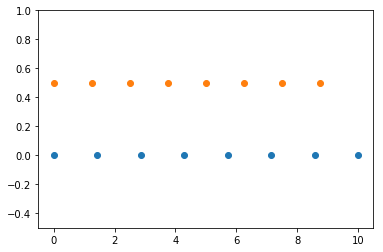

In [51]:
#Example
import matplotlib.pyplot as plt
N = 8
y = np.zeros(N)
x1 = np.linspace(0, 10, N, endpoint=True)
x2 = np.linspace(0, 10, N, endpoint=False)
plt.plot(x1, y, 'o')
print(y,x1)
plt.plot(x2, y + 0.5, 'o')

plt.ylim([-0.5, 1])

plt.show()


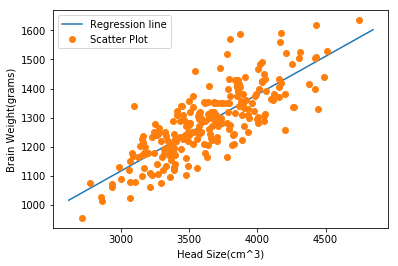

In [52]:
#plotting
max_x=np.max(X)+100
min_x=np.min(X)-100

#calc x and y
x=np.linspace(min_x,max_x,1000)
y=b0+(b1*x)

#plotting line
plt.plot(x,y,label='Regression line')
#plotting scatter points
plt.plot(X,Y,'o',label='Scatter Plot')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [53]:
#R^2  Method to get accuracy
ss_r=0
ss_t=0
for i in range(n):
    yp=b0+(b1*X[i])
    ss_r+=(Y[i]-yp)**2
    ss_t+=(Y[i]-mean_y)**2
r2=(1-ss_r/ss_t)*100
print(r2)

63.93117199570003


63.9311719957


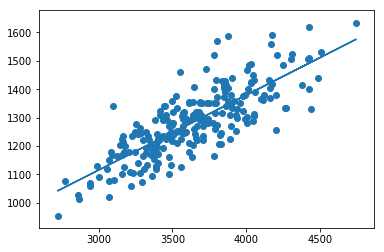

In [80]:
#using scikit learn library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X=data['Head Size(cm^3)'].values  #converting into a list of values
X=X.reshape((n,1))
reg=LinearRegression()
reg=reg.fit(X,Y)
yp=reg.predict(X)
r2=reg.score(X,Y)*100
print(r2)
plt.plot(X,yp)
plt.scatter(X,Y)

In [74]:
b0=reg.intercept_


In [75]:
b1=reg.coef_[0]

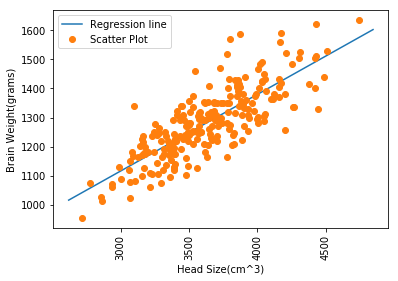

In [82]:
#plotting
max_x=np.max(X)+100
min_x=np.min(X)-100

#calc x and y
x=np.linspace(min_x,max_x,1000)
y=b0+(b1*x)

#plotting line
plt.plot(x,y,label='Regression line')
#plotting scatter points
plt.plot(X,Y,'o',label='Scatter Plot')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.legend()
plt.show()